#### Installing packages

In [1]:
pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [2]:
#Import relevant packages
import pandas as pd
import numpy as np
import re

#### Reading in the data

In [3]:
data_2018 = pd.read_excel("data/2018-v262-16112021-EU MRV Publication of information.xlsx")
data_2019 = pd.read_excel("data/2019-v197-09032022-EU MRV Publication of information.xlsx")
data_2020 = pd.read_excel("data/2020-v121-09032022-EU MRV Publication of information.xlsx")

/Users/bhaveshchainani/opt/anaconda3/lib/python3.8/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [4]:
##cleaning the data to remove first two rows
data_2018.columns = data_2018.iloc[1]
data_2018 = data_2018.iloc[2:]
data_2018 = data_2018.reset_index(drop=True)
data_2018 = data_2018.rename_axis(None, axis=1)
#data_2018

In [5]:
##cleaning the data to remove first two rows
data_2019.columns = data_2019.iloc[1]
data_2019 = data_2019.iloc[2:]
data_2019 = data_2019.reset_index(drop=True)
data_2019 = data_2019.rename_axis(None, axis=1)
#data_2019

In [6]:
##cleaning the data to remove first two rows
data_2020.columns = data_2020.iloc[1]
data_2020 = data_2020.iloc[2:]
data_2020 = data_2020.reset_index(drop=True)
data_2020 = data_2020.rename_axis(None, axis=1)
#data_2020

In [7]:
a = data_2018.columns.to_list()
b = data_2019.columns.to_list()
c = data_2020.columns.to_list()

#both 2018 and 2019 have same column names in list

In [8]:
# Difference in column names as compared to 2020
# ['Annual Time spent at sea [hours]',
# 'Annual Total time spent at sea [hours]', 'Time spent at sea [hours]',
# 'Total time spent at sea [hours]']

In [9]:
data_2020.columns.symmetric_difference(data_2019.columns)

Index(['Annual Time spent at sea [hours]',
       'Annual Total time spent at sea [hours]', 'Time spent at sea [hours]',
       'Total time spent at sea [hours]'],
      dtype='object')

In [10]:
#rename 2020 columns
data_2020 = data_2020.rename(columns={"Time spent at sea [hours]":"Total time spent at sea [hours]",
                         "Annual Time spent at sea [hours]":"Annual Total time spent at sea [hours]"})

In [11]:
#checking that all the column names match
data_2019.columns.to_list() == data_2020.columns.to_list()

True

In [12]:
##combining 3 years worth of data together
data_combined = pd.concat([data_2018, data_2019, data_2020], axis=0)
data_combined = data_combined.reset_index(drop=True)

#### Cleaning Data_Combined (3 years of data combined)

In [13]:
data_combined["Reporting Period"] = data_combined["Reporting Period"].astype(int)

In [14]:
data_combined.drop_duplicates()
#no duplicates

,IMO Number,Name,Ship type,Reporting Period,Technical efficiency,Port of Registry,Home Port,Ice Class,DoC issue date,DoC expiry date,...,Fuel consumption per transport work (pax) on laden voyages [g / pax · n miles],Fuel consumption per transport work (freight) on laden voyages [g / m tonnes · n miles],CO₂ emissions per distance on laden voyages [kg CO₂ / n mile],CO₂ emissions per transport work (mass) on laden voyages [g CO₂ / m tonnes · n miles],CO₂ emissions per transport work (volume) on laden voyages [g CO₂ / m³ · n miles],CO₂ emissions per transport work (dwt) on laden voyages [g CO₂ / dwt carried · n miles],CO₂ emissions per transport work (pax) on laden voyages [g CO₂ / pax · n miles],CO₂ emissions per transport work (freight) on laden voyages [g CO₂ / m tonnes · n miles],Additional information to facilitate the understanding of the reported average operational energy efficiency indicators,Average density of the cargo transported [m tonnes / m³]
0,5383304,ASTORIA,Passenger ship,2018,Not Applicable,NaN,NaN,NaN,05/02/2019,30/06/2020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6417097,MARCO POLO,Passenger ship,2018,Not Applicable,NaN,NaN,IC,05/02/2019,30/06/2020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6511128,RED STAR 1,Ro-pax ship,2018,EIV (45.57 gCO₂/t·nm),NaN,NaN,NaN,30/04/2019,30/06/2020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6602898,OCEAN MAJESTY,Passenger ship,2018,EIV (31.73 gCO₂/t·nm),Madeira,NaN,NaN,06/05/2019,30/06/2020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6703343,EQUALITY,Other ship types,2018,Not Applicable,Beirut,NaN,NaN,30/06/2019,30/06/2020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36448,9903839,POLA VARVARA,General cargo ship,2020,EEDI (14.47 gCO₂/t·nm),NaN,NaN,NaN,30/06/2021,30/06/2022,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36449,9903841,POLA AGATA,General cargo ship,2020,EEDI (14.12 gCO₂/t·nm),NaN,NaN,NaN,30/06/2021,30/06/2022,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36450,9903853,POLA ALEXIA,General cargo ship,2020,EEDI (14.21 gCO₂/t·nm),NaN,NaN,NaN,30/06/2021,30/06/2022,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36451,9903865,POLA MARINA,General cargo ship,2020,EEDI (14.17 gCO₂/t·nm),NaN,NaN,NaN,30/06/2021,30/06/2022,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
## view column names of data_combined
data_combined.columns.to_list()

['IMO Number',
 'Name',
 'Ship type',
 'Reporting Period',
 'Technical efficiency',
 'Port of Registry',
 'Home Port',
 'Ice Class',
 'DoC issue date',
 'DoC expiry date',
 'Verifier Number',
 'Verifier Name',
 'Verifier NAB',
 'Verifier Address',
 'Verifier City',
 'Verifier Accreditation number',
 'Verifier Country',
 'A',
 'B',
 'C',
 'D',
 'Total fuel consumption [m tonnes]',
 'Fuel consumptions assigned to On laden [m tonnes]',
 'Total CO₂ emissions [m tonnes]',
 'CO₂ emissions from all voyages between ports under a MS jurisdiction [m tonnes]',
 'CO₂ emissions from all voyages which departed from ports under a MS jurisdiction [m tonnes]',
 'CO₂ emissions from all voyages to ports under a MS jurisdiction [m tonnes]',
 'CO₂ emissions which occurred within ports under a MS jurisdiction at berth [m tonnes]',
 'CO₂ emissions assigned to Passenger transport [m tonnes]',
 'CO₂ emissions assigned to Freight transport [m tonnes]',
 'CO₂ emissions assigned to On laden [m tonnes]',
 'Annual 

In [16]:
## exploring value counts of "Ship type"
data_combined["Ship type"].value_counts()

Bulk carrier                  10861
Oil tanker                     5792
Container ship                 5504
Chemical tanker                4070
General cargo ship             3647
Vehicle carrier                1335
Ro-pax ship                    1167
Gas carrier                    1006
Ro-ro ship                      788
LNG carrier                     735
Passenger ship                  449
Refrigerated cargo carrier      434
Other ship types                404
Container/ro-ro cargo ship      225
Combination carrier              36
Name: Ship type, dtype: int64

In [17]:
## replacing "Division by zero!" with np.nan
data_combined = data_combined.replace(to_replace ='Division by zero!',
                 value =np.nan)

### EDA Plot Visualisations

<AxesSubplot:title={'center':'Average CO2 emissions (m tonnes) across ship types'}, xlabel='Ship type'>

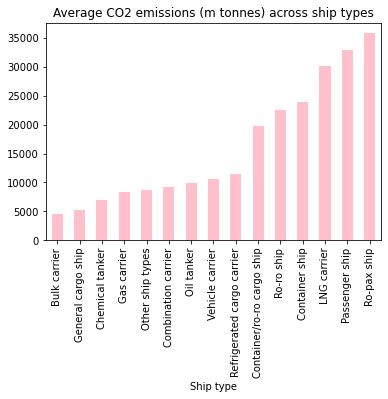

In [18]:
data_combined.groupby('Ship type')["Total CO₂ emissions [m tonnes]"].mean().sort_values(ascending=True).plot(kind='bar',title='Average CO2 emissions (m tonnes) across ship types',color='pink')

<AxesSubplot:title={'center':'Total CO2 emissions (m tonnes) across ship types'}, xlabel='Ship type'>

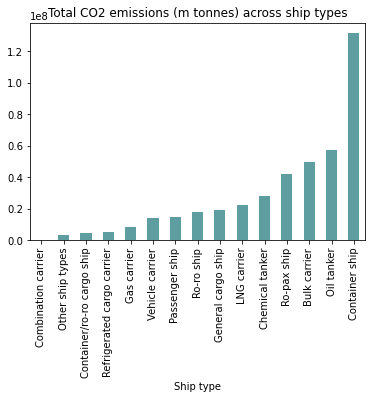

In [19]:
data_combined.groupby('Ship type')["Total CO₂ emissions [m tonnes]"].sum().sort_values(ascending=True).plot(kind='bar',title='Total CO2 emissions (m tonnes) across ship types',color='cadetblue')

<AxesSubplot:title={'center':'Average Fuel consumption (m tonnes) across ship types'}, xlabel='Ship type'>

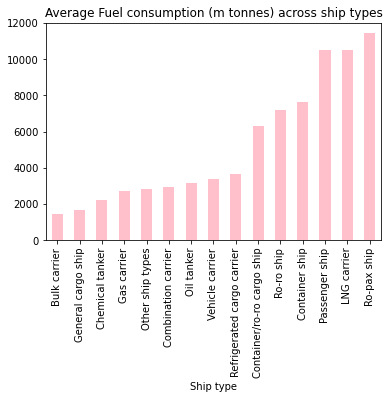

In [20]:
data_combined.groupby('Ship type')["Total fuel consumption [m tonnes]"].mean().sort_values(ascending=True).plot(kind='bar',title='Average Fuel consumption (m tonnes) across ship types',color='pink')

In [21]:
## Replacing 
#data_combined['Annual average Fuel consumption per distance [kg / n mile]'] = data_combined['Annual average Fuel consumption per distance [kg / n mile]'].replace('Division by zero!',0)

<AxesSubplot:title={'center':'Annual average Fuel consumption per distance for ship types'}, xlabel='Ship type'>

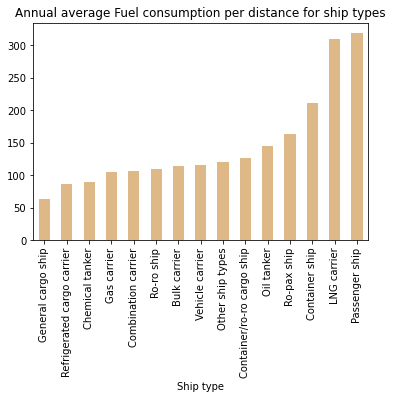

In [22]:
data_combined.groupby('Ship type')["Annual average Fuel consumption per distance [kg / n mile]"].mean().sort_values(ascending=True).plot(kind='bar',title="Annual average Fuel consumption per distance for ship types",color='burlywood')

<AxesSubplot:title={'center':'Annual Total time spent at sea [hours] across ship types'}, xlabel='Ship type'>

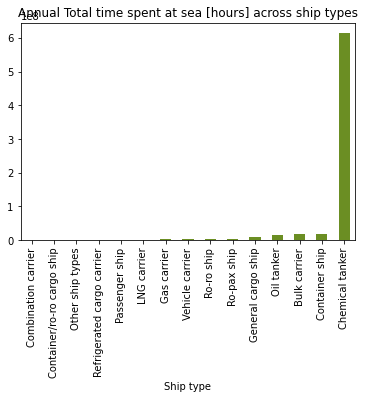

In [23]:
data_combined.groupby('Ship type')["Annual Total time spent at sea [hours]"].sum().sort_values(ascending=True).plot(kind='bar', title="Annual Total time spent at sea [hours] across ship types",color='olivedrab')

In [24]:
def division_fn(x,y):
    try:
        return x/y
    except:
        return 0

<AxesSubplot:title={'center':'Annual average CO2 emissions per distance across ship types'}, xlabel='Ship type'>

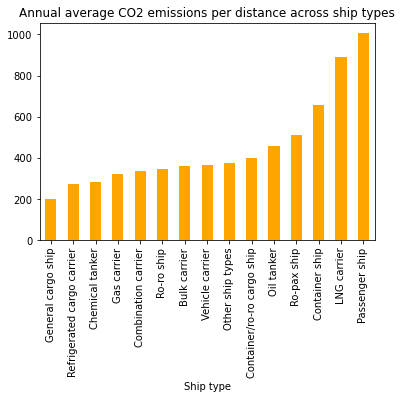

In [25]:
data_combined.groupby('Ship type')['Annual average CO₂ emissions per distance [kg CO₂ / n mile]'].mean().sort_values(ascending=True).plot(kind='bar',title='Annual average CO2 emissions per distance across ship types',color='orange')

In [26]:
#create new column: CO2 emissions per hour
data_combined["C02 emissions per hour"] = data_combined.apply(lambda x: division_fn(x["Total CO₂ emissions [m tonnes]"], x["Annual Total time spent at sea [hours]"]), axis=1)

<AxesSubplot:title={'center':'Annual average CO2 emissions per hour across ship types'}, xlabel='Ship type'>

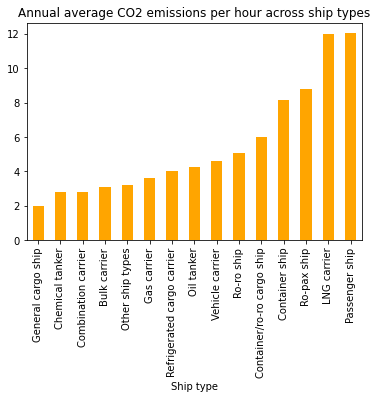

In [27]:
data_combined.groupby('Ship type')["C02 emissions per hour"].mean().sort_values(ascending=True).plot(kind='bar',title='Annual average CO2 emissions per hour across ship types',color='orange')

<AxesSubplot:xlabel='Ship type'>

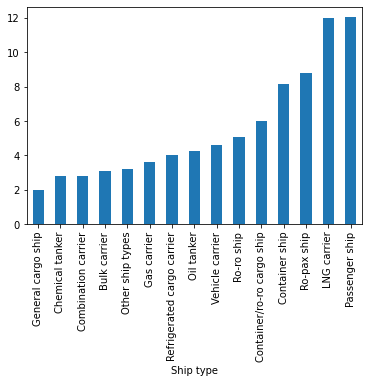

In [28]:
data_combined.groupby('Ship type')["C02 emissions per hour"].mean().sort_values().plot(kind='bar')

In [29]:
data_combined.groupby('Ship type')["C02 emissions per hour"].count()

Ship type
Bulk carrier                  10861
Chemical tanker                4070
Combination carrier              36
Container ship                 5504
Container/ro-ro cargo ship      225
Gas carrier                    1006
General cargo ship             3647
LNG carrier                     735
Oil tanker                     5792
Other ship types                404
Passenger ship                  449
Refrigerated cargo carrier      434
Ro-pax ship                    1167
Ro-ro ship                      788
Vehicle carrier                1335
Name: C02 emissions per hour, dtype: int64

In [30]:
#create new column: CO2 emissions per fuel consumption
data_combined["C02 emissions per fuel consumption"] = data_combined.apply(lambda x: division_fn(x["Total CO₂ emissions [m tonnes]"], x["Total fuel consumption [m tonnes]"]), axis=1)

<AxesSubplot:xlabel='Ship type'>

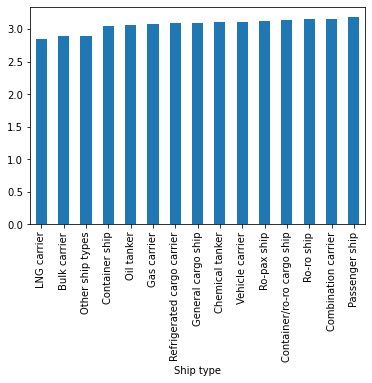

In [31]:
data_combined.groupby('Ship type')["C02 emissions per fuel consumption"].mean().sort_values().plot(kind='bar')

In [32]:
## extract value from Technical efficiency column
for i in range(len(data_combined)):
    x = data_combined["Technical efficiency"][i]
    if re.findall(r"[-+]?\d*\.\d+|\d+", str(x)) == []:
        data_combined.at[i,"tech_eff"] = np.nan
    else:
        data_combined.at[i,"tech_eff"] = re.findall(r"[-+]?\d*\.\d+|\d+", str(x))[0]

In [33]:
first_column = data_combined.pop('tech_eff')
# insert first_column into intended position using insert(position,column_name, first_column) function
data_combined.insert(5, 'tech_eff', first_column)

In [34]:
## extract name from Technical efficiency column
for i in range(len(data_combined)):
    x = data_combined["Technical efficiency"][i]
    try:
        sep = ' ('
        stripped = x.split(sep, 1)[0]
        if not (re.findall(r"[-+]?\d*\.\d+|\d+", str(stripped))):
            data_combined.at[i,"tech_eff_name"] = stripped
        else:
            data_combined.at[i,"tech_eff_name"] = np.nan
    except:
        data_combined.at[i,"tech_eff_name"] = x

In [35]:
first_column = data_combined.pop('tech_eff_name')
# insert first_column into intended position using insert(position,column_name, first_column) function
data_combined.insert(5, 'tech_eff_name', first_column)

In [36]:
#view statistics for tech_eff
data_combined.groupby('Ship type')['tech_eff'].describe()

,count,mean,std,min,25%,50%,75%,max
Ship type,,,,,,,,
Bulk carrier,10012.0,7.591864,101.269477,0.00,3.9000,4.860,6.1400,5857.00
Chemical tanker,3732.0,8.711152,4.370057,0.00,5.6800,7.320,10.9625,98.00
Combination carrier,32.0,14.610312,12.346210,3.59,5.0100,8.590,22.6900,41.00
Container ship,4806.0,18.425728,8.674169,0.00,12.3525,18.100,22.7400,205.00
Container/ro-ro cargo ship,211.0,11.039005,5.210459,6.89,8.1100,9.280,12.3900,45.00
Gas carrier,898.0,12.625445,6.388954,1.00,7.5000,11.210,17.0000,54.96
General cargo ship,3176.0,14.011867,19.745771,0.00,9.8975,13.370,15.4200,1058.00
LNG carrier,615.0,19.541837,236.162234,3.06,6.0900,7.620,10.4800,5856.00
Oil tanker,5410.0,5.972346,41.214481,0.00,3.3200,4.160,6.0500,2992.00


#### Extracting EEOI values

In [37]:
transport_work_mass = ['Bulk carrier',
'Chemical tanker',
'Combination carrier',
'Container ship',
'Container/ro-ro cargo ship',
'Gas carrier',
'LNG carrier',
'Oil tanker',
'Other ship types',
'Refrigerated cargo carrier',
'Ro-ro ship',
'Vehicle carrier']

In [38]:
transport_work_pax = ['Passenger ship']

In [39]:
transport_work_dwt = ['General cargo ship']

In [40]:
transport_work_freight = ['Ro-pax ship']

In [41]:
## map EEOI column based on ship type

for i in range(len(data_combined)):
    x = data_combined["Ship type"][i]
    if x in transport_work_mass:
        data_combined.at[i,"EEOI_Index"] = data_combined["Annual average CO₂ emissions per transport work (mass) [g CO₂ / m tonnes · n miles]"][i]
    elif x in transport_work_pax:
        data_combined.at[i,"EEOI_Index"] = data_combined["Annual average CO₂ emissions per transport work (pax) [g CO₂ / pax · n miles]"][i]
    elif x in transport_work_dwt:
        data_combined.at[i,"EEOI_Index"] = data_combined["Annual average CO₂ emissions per transport work (dwt) [g CO₂ / dwt carried · n miles]"][i]
    elif x in transport_work_freight:
        data_combined.at[i,"EEOI_Index"] = data_combined["Annual average CO₂ emissions per transport work (freight) [g CO₂ / m tonnes · n miles]"][i]

In [42]:
## save data_combined

# data_combined.to_csv("data_combined.csv",index=False)
# data_combined.to_excel("data_combined.xlsx",index=False)

In [43]:
## filter data_combined to subset of columns

columns_to_keep = ['Ship type',
                   'Reporting Period',
                   'Technical efficiency',
                   'tech_eff_name',
                   'tech_eff',
                   'Port of Registry',
                   'Home Port',
                   'Total fuel consumption [m tonnes]',
                   'Total CO₂ emissions [m tonnes]',
                   'CO₂ emissions from all voyages between ports under a MS jurisdiction [m tonnes]',
                   'CO₂ emissions from all voyages which departed from ports under a MS jurisdiction [m tonnes]',
                   'CO₂ emissions from all voyages to ports under a MS jurisdiction [m tonnes]',
                   'CO₂ emissions which occurred within ports under a MS jurisdiction at berth [m tonnes]',
                   'Annual Total time spent at sea [hours]',
                   'Annual average Fuel consumption per distance [kg / n mile]',
                   'Annual average Fuel consumption per transport work (mass) [g / m tonnes · n miles]',
                   'Annual average CO₂ emissions per distance [kg CO₂ / n mile]',
                   'Annual average CO₂ emissions per transport work (mass) [g CO₂ / m tonnes · n miles]',
                   'C02 emissions per hour', 
                   'C02 emissions per fuel consumption',
                  'EEOI_Index']

In [44]:
data_combined_clean = data_combined[columns_to_keep]

### Removing outliers (focusing on removing 10th and 90th percentile values)

In [45]:
## removing outliers for tech_eff column

In [46]:
tech_range = data_combined_clean.groupby('Ship type')["tech_eff"].describe(percentiles=[0.1,0.9]).reset_index()

In [47]:
tech_range_clean = pd.DataFrame()
for i in range(len(tech_range)):
    x = tech_range["Ship type"][i]
    data = data_combined_clean[data_combined_clean["Ship type"] == x]
    data = data[data["tech_eff"].between(tech_range["10%"][i],tech_range["90%"][i])]
    tech_range_clean = pd.concat(([tech_range_clean,data]))
tech_range_clean = tech_range_clean.reset_index(drop=True)

In [48]:
## removing outliers for co2 emissions per hour column

In [49]:
co2_range = data_combined_clean.groupby('Ship type')["C02 emissions per hour"].describe(percentiles=[0.1,0.9]).reset_index()

In [50]:
co2_range_clean = pd.DataFrame()
for i in range(len(co2_range)):
    x = co2_range["Ship type"][i]
    data = data_combined_clean[data_combined_clean["Ship type"] == x]
    data = data[data["C02 emissions per hour"].between(co2_range["10%"][i],co2_range["90%"][i])]
    co2_range_clean = pd.concat(([co2_range_clean,data]))
co2_range_clean = co2_range_clean.reset_index(drop=True)

In [51]:
## removing outlier for eeoi_index column

In [52]:
eeoi_range = data_combined_clean.groupby('Ship type')["EEOI_Index"].describe(percentiles=[0.1,0.9]).reset_index()

In [53]:
eeoi_range_clean = pd.DataFrame()
for i in range(len(eeoi_range)):
    x = eeoi_range["Ship type"][i]
    data = data_combined_clean[data_combined_clean["Ship type"] == x]
    data = data[data["EEOI_Index"].between(eeoi_range["10%"][i],eeoi_range["90%"][i])]
    eeoi_range_clean = pd.concat(([eeoi_range_clean,data]))
eeoi_range_clean = eeoi_range_clean.reset_index(drop=True)

In [54]:
## inner merge 3 dataframes to remove all outliers across the 3 columns of interest
merged_df = pd.merge(tech_range_clean, co2_range_clean, on=data_combined_clean.columns.tolist())
finaldf = pd.merge(merged_df, eeoi_range_clean, on=data_combined_clean.columns.tolist())

<AxesSubplot:title={'center':'Average Theoretical CO2 emissions per capacity mile across ship types'}, xlabel='Ship type'>

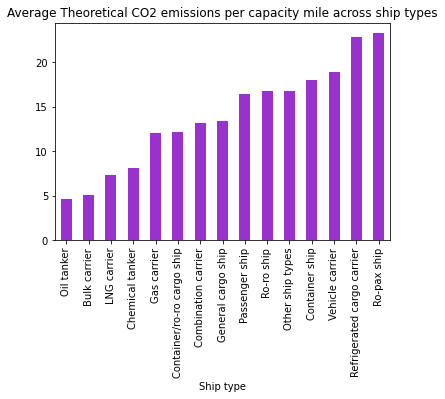

In [55]:
finaldf.groupby('Ship type')["tech_eff"].mean().sort_values(ascending=True).plot(kind='bar',title='Average Theoretical CO2 emissions per capacity mile across ship types',color='darkorchid')

<AxesSubplot:title={'center':'Average EEOI Index across ship types'}, xlabel='Ship type'>

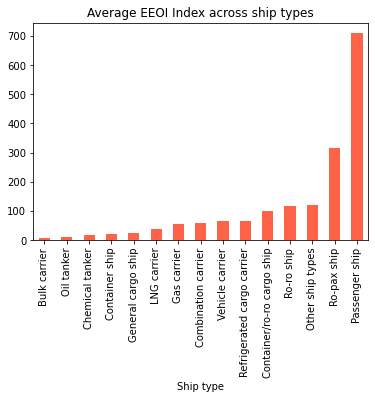

In [56]:
finaldf.groupby('Ship type')["EEOI_Index"].mean().sort_values(ascending=True).plot(kind='bar',title='Average EEOI Index across ship types',color='tomato')

In [57]:
## save finaldf to csv file for running Clustering + Scoring

#finaldf.to_csv("outlier_removed.csv",index=False)